In [1]:
%matplotlib inline
import torch, torchvision
from torch import nn
from torch.utils.data import DataLoader
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, Sequential
from IPython.display import display, Image
import matplotlib.pyplot as plt

In [2]:
dataset = torchvision.datasets.CIFAR10("..\P15_DataLoader\dataset", train=False, download=True, transform=torchvision.transforms.ToTensor())
dataloader = DataLoader(dataset, batch_size = 16)

Files already downloaded and verified


Write a Learning Model: The convolution's kernel matrix, MasPools's matrix, and linear transformation's parameters are the MODEL PARAMETER! Those would be optimilized by trainning process.

In [3]:
class CIFAR10model(nn.Module):
    def __init__(self):
        super(CIFAR10model, self).__init__()
        self.model1 = Sequential(
          Conv2d(3, 32, 5, padding=2),
          MaxPool2d(2),
          Conv2d(32,32,5, padding=2),
          MaxPool2d(2),
          Conv2d(32,64,5, padding=2),
          MaxPool2d(2),
          Flatten(),
          Linear(1024,64),             # be careful, the last step is linearing 1024 data to 64 then linear to 10
          Linear(64,10)
        )

    def forward(self, input):
        output1 = self.model1(input)
        return output1
  
Train1 = CIFAR10model()

Set up:

In [4]:
loss = nn.CrossEntropyLoss()                            # pick up a loss function
Cmodel = CIFAR10model()                                 # pick up a model
optim = torch.optim.SGD(Cmodel.parameters(), lr=0.01,)  # pick up a trainning method with inputting model's parameters
                                                        # lr = Learning Rate
                                                        # high lr = faster, but lower accuracy
                                                        # can use StepLR to modify lr during trainning

x_coordinate = []    # create a list for storing number of step 
y_coordinate = []    # create a list for storing loss function for each step
step = 0             # first step is marked as zero

Machine Learning Process:

In [8]:
for epoch in range(5):                   # run the trainning by 5 times
    for data in dataloader:
        imgs, targets = data                   # load data
        outputs = Cmodel(imgs)                 # send img to model
        result_loss = loss(outputs, targets)   # calculate loss function
        optim.zero_grad()                   # clear the current gradient values
        result_loss.backward()              # record gradient values (to somewhere)
        optim.step()                        # use those gradient values to calculate better model parameters
        #print(result_loss)
        x_coordinate.append(step)                   # record step number mark
        step += 1
        y_coordinate.append(result_loss.tolist())   # record the loss function for each step

In [10]:
print(result_loss)
print(result_loss.tolist())  # Use tolist() to read loss function

tensor(1.2847, grad_fn=<NllLossBackward0>)
1.2847281694412231


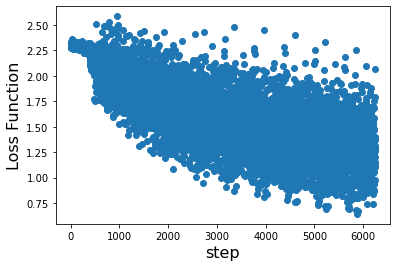

In [9]:
plt.scatter(x_coordinate, y_coordinate)
plt.xlabel('step', fontsize=16)
plt.ylabel('Loss Function', fontsize=16)
plt.show()